In [ ]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from statsmodels.tsa.stattools import coint

# set the seed for the random number generator
np.random.seed(107)

### PCA

In [ ]:
df_prices_train = pd.read_csv("data/etfs/df_prices_train.csv", index_col=0)
df_prices_train.head()

,AGQ,AMJ,AMLP,AMU,AMZA,ATMP,BNO,BOIL,CANE,CGW,...,USO,VDE,WEAT,XES,XLE,XME,XOP,YMLP,ZMLP,ZSL
2015-01-02 00:00:00+00:00,38.42,25.599871,43.707435,19.249564,62.214415,18.775602,22.0199,3204.0,11.5900,24.501518,...,159.120,83.842583,12.5400,254.709625,56.244960,27.040231,168.479924,98.249776,139.746985,235.58
2015-01-05 00:00:00+00:00,40.46,24.437728,42.519464,18.378131,57.465489,18.012219,20.7000,3144.0,11.4501,23.914393,...,150.320,80.516682,12.6500,242.350297,53.918217,26.041661,157.677695,95.068211,135.372226,224.32
2015-01-06 00:00:00+00:00,42.10,23.946682,41.950228,18.059473,57.175761,17.721406,19.9200,3150.0,11.8600,23.756658,...,144.400,79.305905,12.7300,234.737668,53.126134,25.682526,152.903807,94.310695,133.123518,215.26
2015-01-07 00:00:00+00:00,42.13,23.968506,41.801731,18.020454,56.540442,17.569941,19.9700,3036.0,11.7100,23.984498,...,146.952,79.500228,12.4761,232.409099,53.239288,25.796398,151.370587,93.401676,132.346691,215.12
2015-01-08 00:00:00+00:00,40.94,24.279502,42.172972,18.235060,57.312115,17.794170,20.0100,3180.0,12.0700,24.177285,...,148.400,81.219232,12.2300,236.260193,54.434485,26.041661,156.492934,95.522720,134.595399,221.00


In [ ]:
df_returns_train = df_prices_train.pct_change()
df_returns_train = df_returns_train.iloc[1:]
df_returns_train.head()

,AGQ,AMJ,AMLP,AMU,AMZA,ATMP,BNO,BOIL,CANE,CGW,...,USO,VDE,WEAT,XES,XLE,XME,XOP,YMLP,ZMLP,ZSL
2015-01-05 00:00:00+00:00,0.053097,-0.045396,-0.027180,-0.045270,-0.076332,-0.040658,-0.059941,-0.018727,-0.012071,-0.023963,...,-0.055304,-0.039668,0.008772,-0.048523,-0.041368,-0.036929,-0.064116,-0.032382,-0.031305,-0.047797
2015-01-06 00:00:00+00:00,0.040534,-0.020094,-0.013388,-0.017339,-0.005042,-0.016145,-0.037681,0.001908,0.035799,-0.006596,...,-0.039383,-0.015038,0.006324,-0.031412,-0.014690,-0.013791,-0.030276,-0.007968,-0.016611,-0.040389
2015-01-07 00:00:00+00:00,0.000713,0.000911,-0.003540,-0.002161,-0.011112,-0.008547,0.002510,-0.036190,-0.012648,0.009591,...,0.017673,0.002450,-0.019945,-0.009920,0.002130,0.004434,-0.010027,-0.009639,-0.005835,-0.000650
2015-01-08 00:00:00+00:00,-0.028246,0.012975,0.008881,0.011909,0.013648,0.012762,0.002003,0.047431,0.030743,0.008038,...,0.009854,0.021623,-0.019726,0.016570,0.022450,0.009508,0.033840,0.022709,0.016991,0.027334
2015-01-09 00:00:00+00:00,0.017587,-0.002921,0.000587,-0.000357,0.002554,0.001158,-0.017491,0.011950,-0.009114,-0.001450,...,-0.014555,-0.006994,-0.007359,-0.014026,-0.007925,-0.002355,0.007793,0.000000,0.002126,-0.016561


In [ ]:
# If we exam all the possible pairs by iterating all the columns
print('Number of all possible pairs: ', df_returns_train.shape[1]*(df_returns_train.shape[1]-1)/2)


Number of all possible pairs:  7260.0


In [ ]:
# PCA
N_PRIN_COMPONENTS = 5
pca = PCA(n_components=N_PRIN_COMPONENTS, svd_solver='auto', random_state=0)
pca.fit(df_returns_train)
explained_variance = pca.explained_variance_
print(explained_variance)

[0.04140252 0.02319091 0.01410398 0.00316711 0.00203531]


In [ ]:
# shape of the factor loading matrix
pca.components_.T.shape

(121, 5)

In [ ]:
# standardize
X = preprocessing.StandardScaler().fit_transform(pca.components_.T)
clf = DBSCAN(eps=0.15, min_samples=3, metric='euclidean')
# clf = DBSCAN(eps=0.25, min_samples=2)
print (clf)

DBSCAN(eps=0.15, min_samples=3)


In [ ]:
clf.fit(X)
labels = clf.labels_
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Labels: ", labels)

unique_labels = set(labels)
# -1 is a noise label in DBSCAN algorithm
if -1 in unique_labels:
    n_clusters_ = len(unique_labels) - 1
else:
    n_clusters_ = len(unique_labels)
print ("\nClusters in total: %d" % n_clusters_)
# clustered = clf.labels_

Labels:  [-1  0  0  0 -1  0 -1 -1  1  2 -1  1 -1  1 -1  3 -1 -1 -1  4 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1  2 -1  1 -1 -1  1  6 -1  7 -1 -1
 -1 -1 -1 -1  7  8  9  0 -1  5 -1 -1 -1 -1 -1  0 -1  0 10 10 -1 -1 -1  9
  7 -1  3  2 -1  2 -1 -1  8 -1  9 -1  6  1  3 -1  8 -1  6  7 -1 -1  4  4
 -1 -1  1  3 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  5  1 -1  5 -1 -1 -1 10
 -1]

Clusters in total: 11


In [ ]:
labels.flatten()

array([-1,  0,  0,  0, -1,  0, -1, -1,  1,  2, -1,  1, -1,  1, -1,  3, -1,
       -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  5, -1,  2, -1,  1, -1, -1,  1,  6, -1,  7, -1, -1, -1, -1, -1,
       -1,  7,  8,  9,  0, -1,  5, -1, -1, -1, -1, -1,  0, -1,  0, 10, 10,
       -1, -1, -1,  9,  7, -1,  3,  2, -1,  2, -1, -1,  8, -1,  9, -1,  6,
        1,  3, -1,  8, -1,  6,  7, -1, -1,  4,  4, -1, -1,  1,  3, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  5,  1, -1,  5, -1, -1, -1,
       10, -1])

In [ ]:
#Find Clusters
returns = df_returns_train
clustered_series_all = pd.Series(index=returns.columns, data=labels.flatten())
clustered_series = clustered_series_all[clustered_series_all != -1]
# CLUSTER_SIZE_LIMIT = 5000
counts = clustered_series.value_counts()
# ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]
print ("Clusters formed: %d" % len(counts))
print ("Pairs to exam: %d" % (counts * (counts - 1) / 2).sum())
# print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())


Clusters formed: 11
Pairs to exam: 96


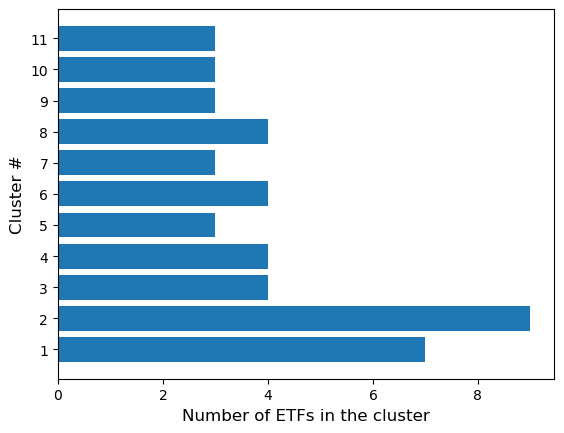

In [ ]:
plt.figure()
plt.barh(counts.index+1, counts.values)
#plt.title('Cluster Member Counts')
plt.yticks(np.arange(1, len(counts)+1, 1))
plt.xlabel('Number of ETFs in the cluster', size=12)
plt.ylabel('Cluster #', size=12);

In [ ]:
etfs = pd.read_excel('data/etfs/commodity_ETFs_long_updated.xlsx')

# remove duplicated
etfs_unique = etfs[~etfs.duplicated(subset=['Ticker'], keep='first')].sort_values(['Ticker'])
tickers = etfs_unique.Ticker.unique()
# tickers

In [ ]:
for label_i in range(len(counts)):
    elements_cluster_i = list(clustered_series[clustered_series == label_i].index)
    etfs_cluster_i = etfs_unique[etfs_unique['Ticker'].isin(elements_cluster_i)]
    print('\nCluster {}:\n{}'.format(label_i, etfs_cluster_i[['Ticker', 'Segment']]))
    


Cluster 0:
    Ticker            Segment
145    AMJ  Equity: U.S. MLPs
143   AMLP  Equity: U.S. MLPs
160    AMU  Equity: U.S. MLPs
156   ATMP  Equity: U.S. MLPs
183   IMLP  Equity: U.S. MLPs
150   MLPA  Equity: U.S. MLPs
148   MLPI  Equity: U.S. MLPs

Cluster 1:
   Ticker                            Segment
8    CANE     Commodities: Agriculture Sugar
2    CORN      Commodities: Agriculture Corn
0     DBA           Commodities: Agriculture
47   FTGC          Commodities: Broad Market
53    GCC          Commodities: Broad Market
18    RJA           Commodities: Agriculture
5    SOYB  Commodities: Agriculture Soybeans
36   USCI          Commodities: Broad Market
3    WEAT     Commodities: Agriculture Wheat

Cluster 2:
    Ticker               Segment
375    CGW  Equity: Global Water
376    FIW  Equity: Global Water
374    PHO  Equity: Global Water
377    PIO  Equity: Global Water

Cluster 3:
    Ticker                    Segment
26     DBC  Commodities: Broad Market
25    PDBC  Commoditi

/Users/jw2379/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


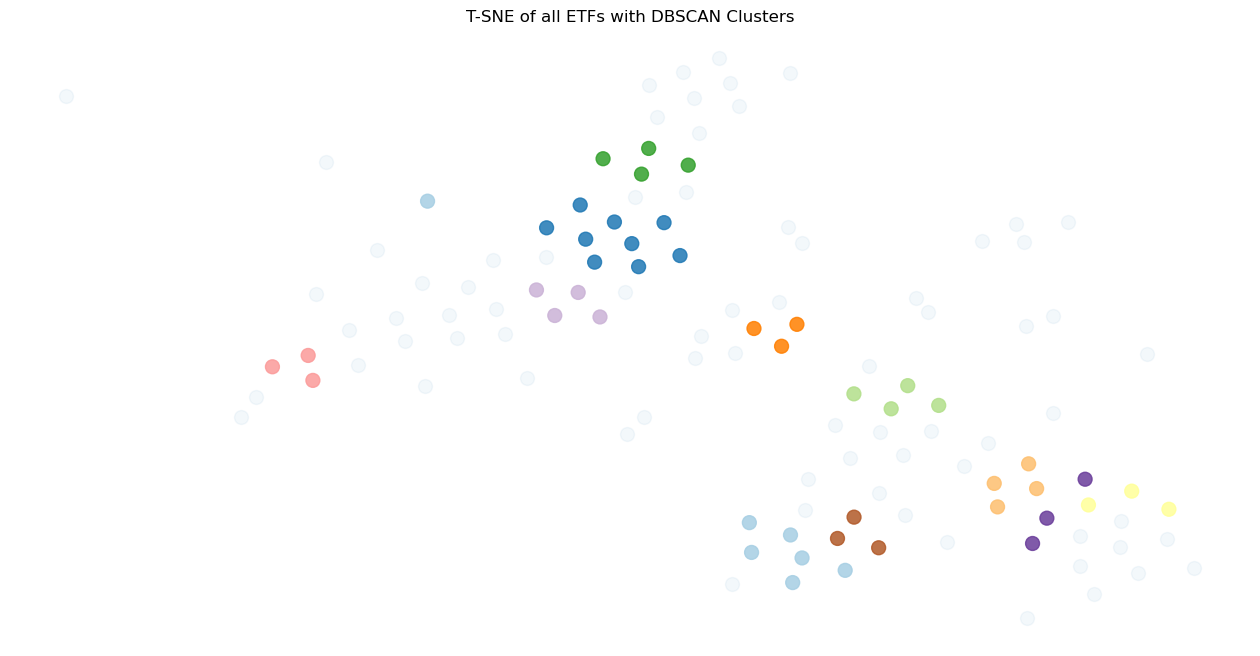

In [ ]:
X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)
# plt.figure(1, facecolor='white')
plt.figure(figsize=(16, 8), facecolor='white')
plt.clf()
plt.axis('off')
plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1],
    cmap=cm.Paired
)
plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=100,
    alpha=0.05
)
plt.title('T-SNE of all ETFs with DBSCAN Clusters');


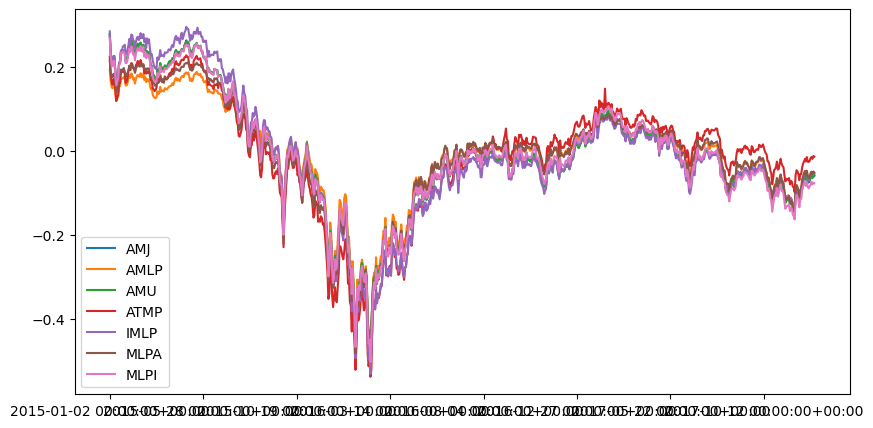

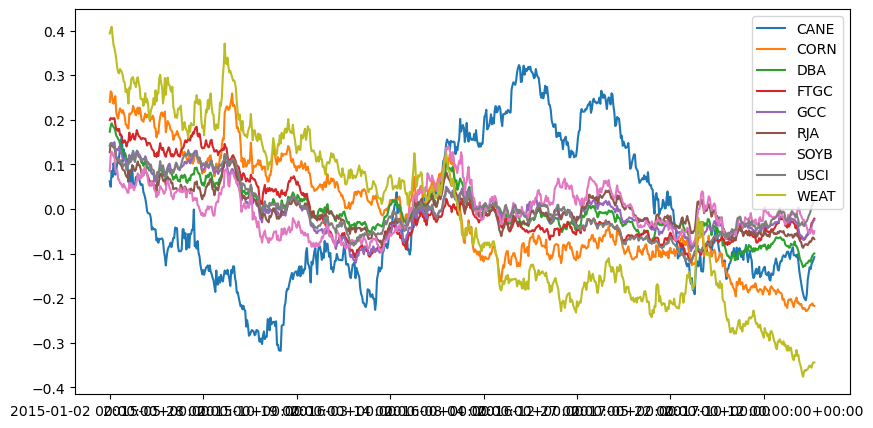

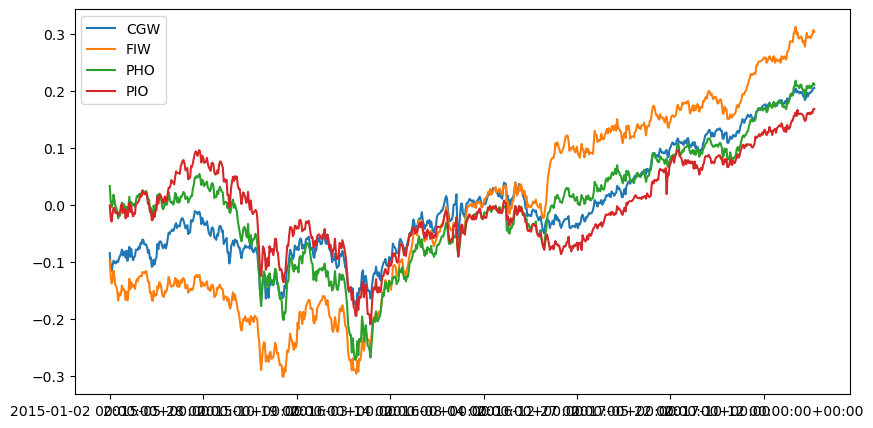

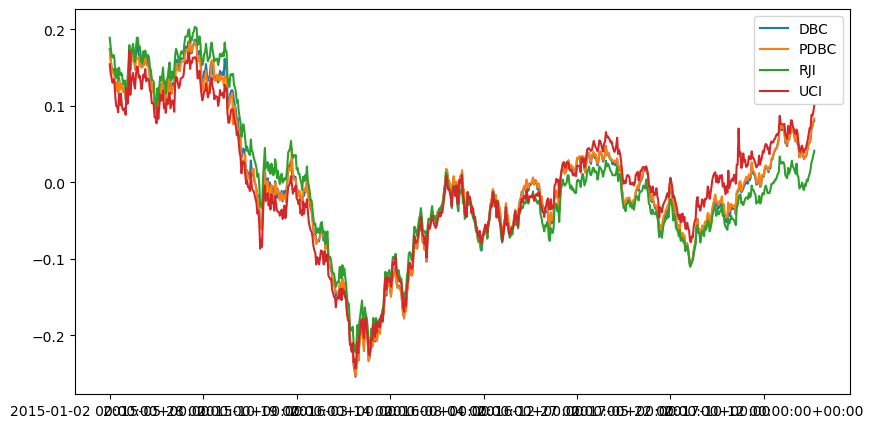

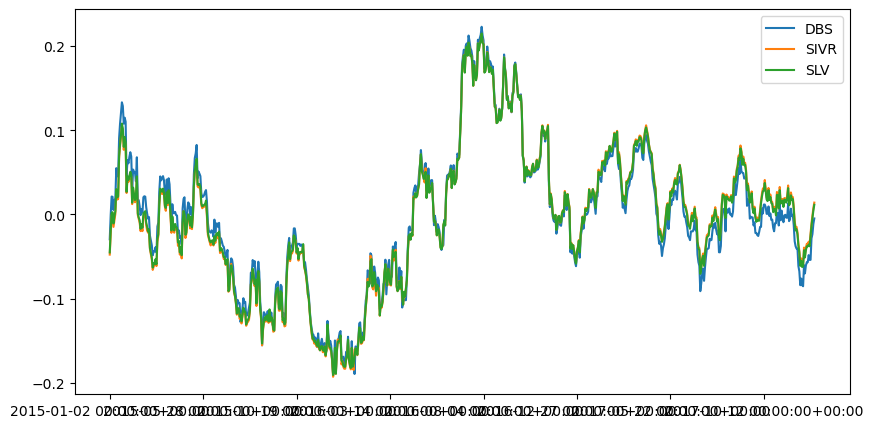

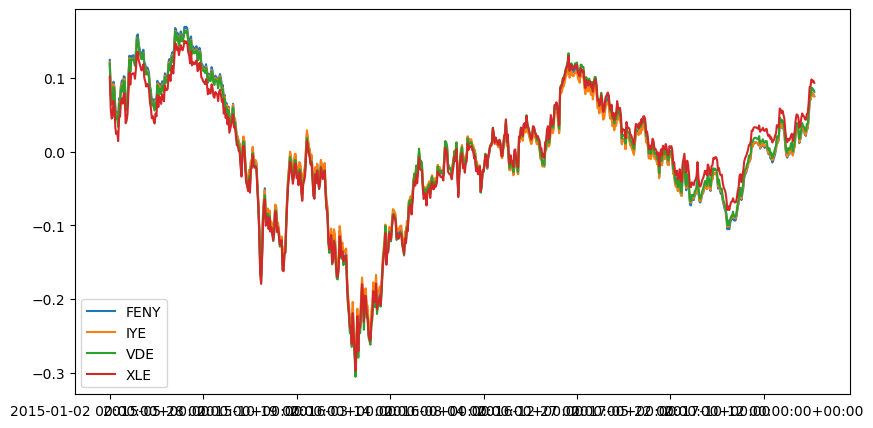

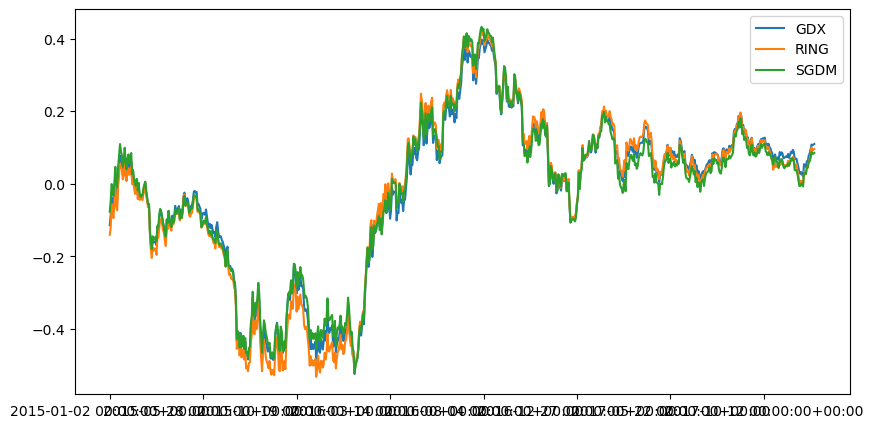

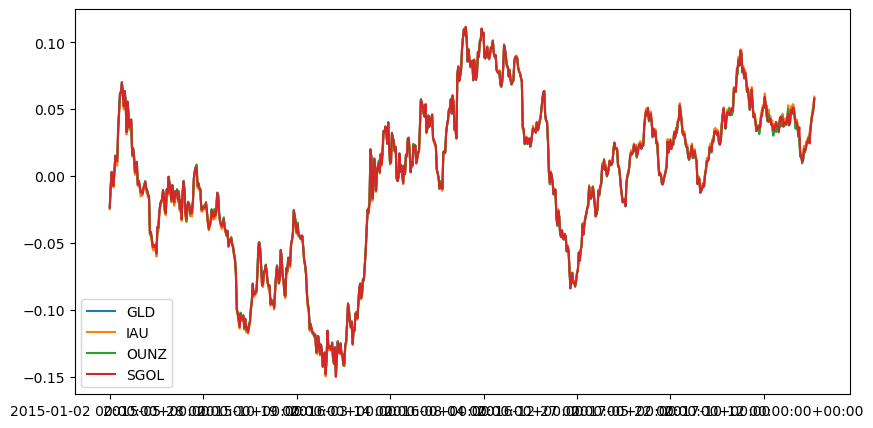

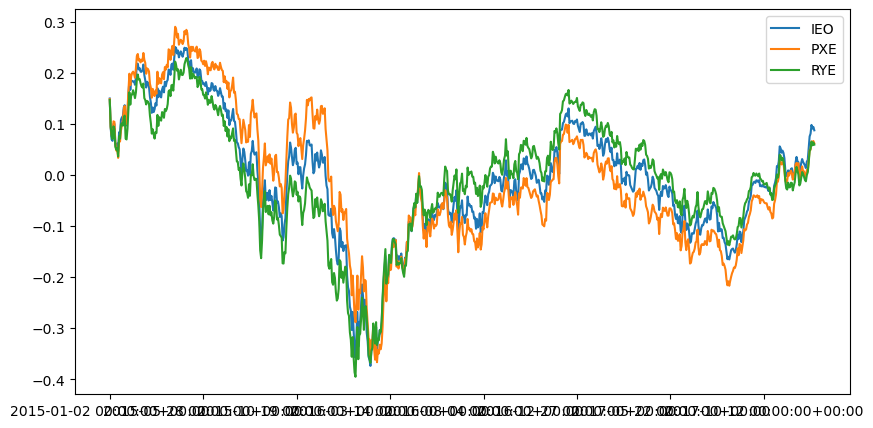

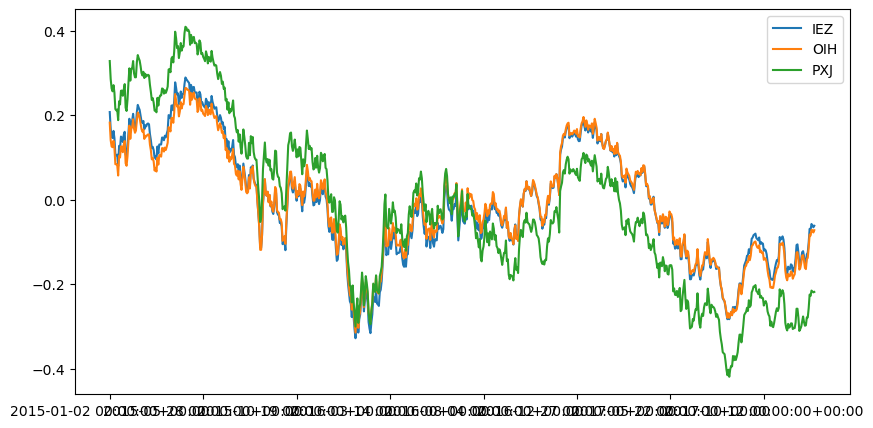

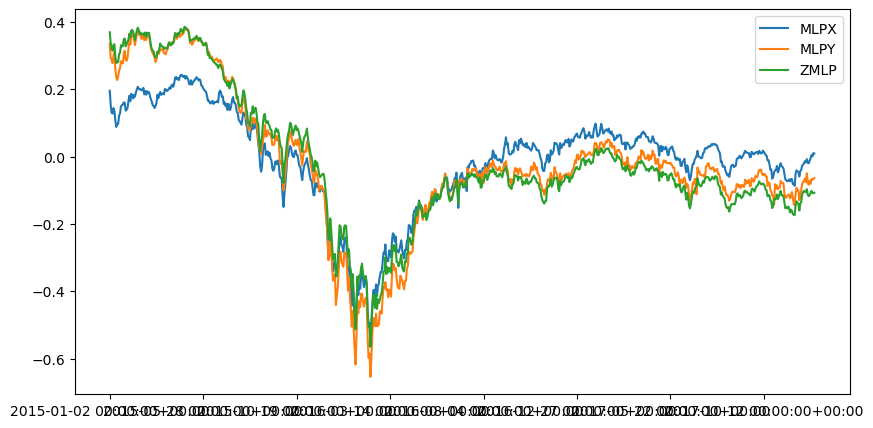

In [ ]:
for clust in range(len(counts)):
    symbols = list(clustered_series[clustered_series==clust].index)
    means = np.log(df_prices_train[symbols].mean())
    series = np.log(df_prices_train[symbols]).sub(means)
    series.plot(figsize=(10,5))#title='ETFs Time Series for Cluster %d' % (clust+1))

In [ ]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [ ]:
clustered_dict = {}
for ticker, cluster_number in clustered_series.items():
    if cluster_number not in clustered_dict:
        clustered_dict[cluster_number] = [ticker]
    else:
        clustered_dict[cluster_number].append(ticker)

In [ ]:
conint_pairs = []
for cluster_i, ticker_list in clustered_dict.items():
    print("Cluster %d" % cluster_i)
    prices_df = df_prices_train[ticker_list]
    scores, pvalues, pairs = find_cointegrated_pairs(prices_df)
    print(pairs, '\n')
    conint_pairs.extend(pairs)
    
print("All conintegrated pairs: ", conint_pairs)

Cluster 0
[('AMJ', 'AMU')] 

Cluster 1
[('CORN', 'WEAT')] 

Cluster 2
[] 

Cluster 3
[] 

Cluster 4
[] 

Cluster 5
[] 

Cluster 6
[('RING', 'SGDM')] 

Cluster 7
[('GLD', 'OUNZ'), ('GLD', 'SGOL'), ('OUNZ', 'SGOL')] 

Cluster 8
[] 

Cluster 9
[] 

Cluster 10
[] 

All conintegrated pairs:  [('AMJ', 'AMU'), ('CORN', 'WEAT'), ('RING', 'SGDM'), ('GLD', 'OUNZ'), ('GLD', 'SGOL'), ('OUNZ', 'SGOL')]
